In [33]:
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt


def adjust_r(p, r):
    r = r[:, None] 
    p = p[None, :]
    return r * p /((1 + r) * (1 - p))


def plot_adjust_r(p_values, r_values):
    # Calculate data
    adjusted_r_values = adjust_r(p_values, r_values)
    # Find masks of different interesting areas    
    mask = adjusted_r_values > r_values[:, None]  # Area where adjusted r is greater than r
    mask_assumption_wrong = (1 - p_values[None, :]) * (1 + r_values[:, None]) > 1

    fig, (ax, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(18, 9))
    im = ax.contourf(p_values, r_values, adjusted_r_values, levels=30, cmap="viridis")
    # Add magnitude labels to the contour plot
    contours = ax.contour(p_values, r_values, adjusted_r_values, levels=30, cmap="binary", linewidths=0.5)
    ax.clabel(contours, inline=True, fontsize=8, fmt="%.2f")
    
    # Masks
    ax.contour(p_values, r_values, mask, levels=[0.5], colors='blue', linestyles='-', linewidths=3)  # Mask for r_D > r
    ax.contour(p_values, r_values, mask_assumption_wrong, levels=[0.1], colors='red', linestyles='-', linewidths=3)  # Mask for r_D > r
    
    # Axis setup
    ax.set_xlabel('p values')
    ax.set_ylabel('r values')
    ax.set_title("Adjusted r values")
    
    # Custom legend for the contour plot of the mask
    custom_lines = [Line2D([0], [0], color='blue', linestyle='-', lw=2, label="r_D > r (right of line)"), 
                    Line2D([0], [0], color='red', linestyle='-', lw=2, label="Assumption wrong (left of line)")]
    ax.legend(handles=custom_lines, loc="upper left")
    fig.colorbar(im, ax=ax, label=r"$r_D$")
    
    
    # Plotting the percentage difference
    percent_diff = (adjusted_r_values - r_values[:, None]) / r_values[:, None] * 100
    im2 = ax1.contourf(p_values, r_values, percent_diff, levels=30, cmap="viridis")
    contours2 = ax1.contour(p_values, r_values, percent_diff, levels=30, cmap="binary", linewidths=0.5)
    ax1.clabel(contours2, inline=True, fontsize=8, fmt="%.2f")
    ax1.set_xlabel('p values')
    ax1.set_ylabel('r values')
    ax1.set_title("Percentage difference in adjusted r and r")
    fig.colorbar(im2, ax=ax1, label="Percentage difference")
    
    fig.suptitle(r"$r_D = r P_D / \left[(1+r)(1-P_D)\right]$", fontsize=12)
    plt.show()

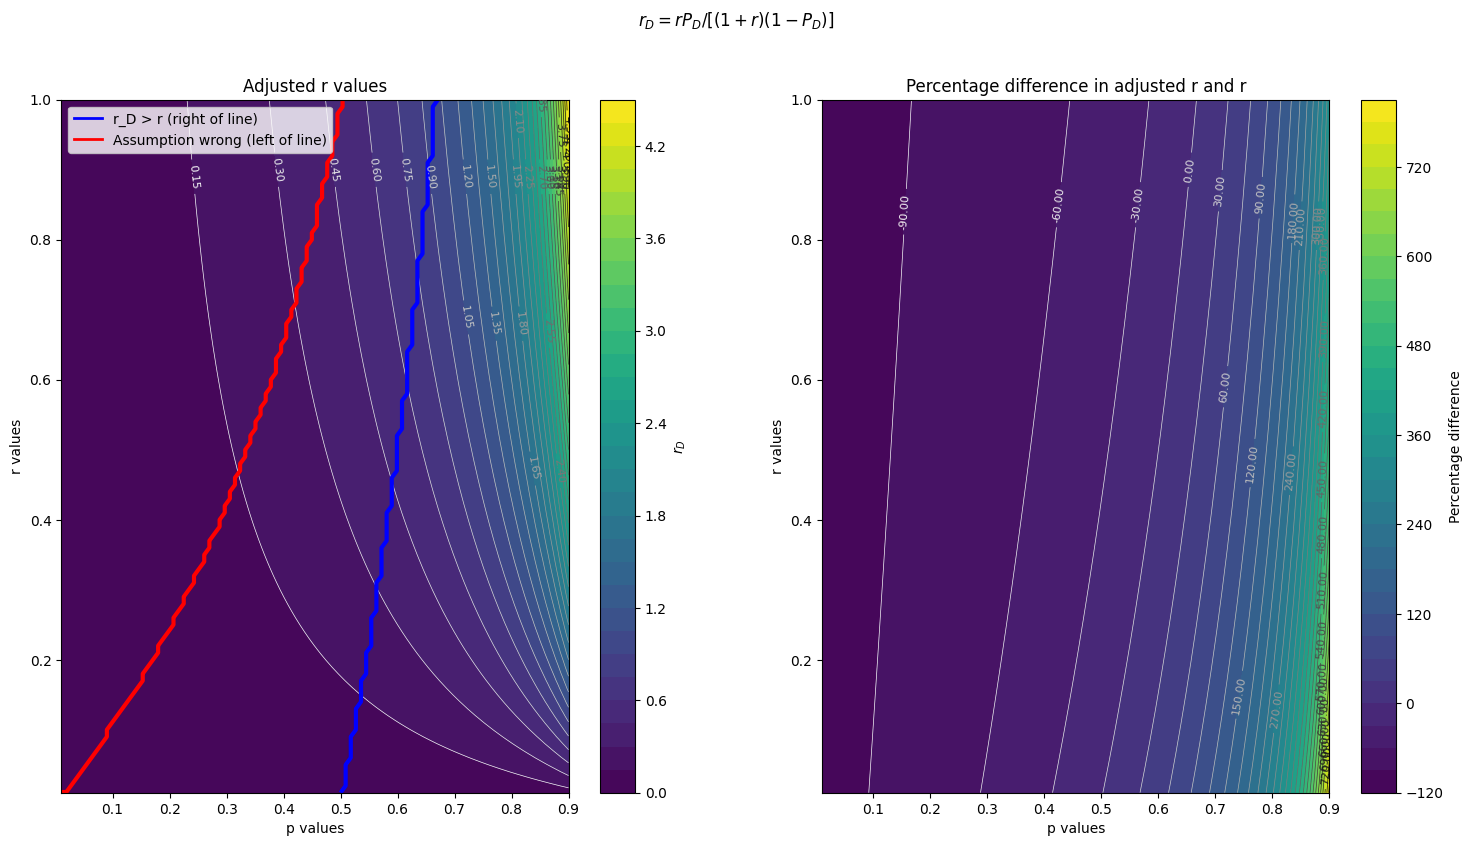

In [34]:
p = np.linspace(0.01, 0.9, 100)
r = np.linspace(0.01, 1, 100)  
plot_adjust_r(p, r)